## Week 3 

- 带正则项的多元线性回归
- 带正则项的多元逻辑回归（分类）
- 可视化


In [84]:
import numpy as np
import matplotlib.pyplot as plt


In [85]:
def load_data(path):
    data = np.loadtxt(path, delimiter=',')
    X = data[:, :-1]
    y = data[:, -1]
    return X, y


def sigmoid(z):
    z = np.clip(z, -500, 500)   # 避免溢出
    return 1 / (1 + np.exp(-z))


def forward_linear(X, w, b):
    return np.dot(X, w) + b


def forward_logistic(X, w, b):
    return 1 / (1 + np.exp(-(np.dot(X, w) + b)))


def linear_loss(y_pred, y_true, c, w):
    return 0.5 * np.mean((y_pred - y_true) ** 2) + 0.5 * c * np.sum(w ** 2)


def logistic_loss(y_pred, y_true, c, w):
    eps = 1e-8    
    y_pred = np.clip(y_pred, eps, 1 - eps)    # 裁剪y_pred，避免 log(0)
    return - np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) + 0.5 * c * np.sum(w ** 2)


def linear_gradient(X, y_true, y_pred, c, w):
    dw = np.mean((y_pred - y_true).reshape(-1, 1) * X, axis=0) + c * w
    db = np.mean(y_pred - y_true)
    return dw, db


def logistic_gradient(X, y_true, y_pred, c, w):
    dw = np.mean((y_pred - y_true).reshape(-1, 1) * X, axis=0) + c * w
    db = np.mean(y_pred - y_true)
    return dw, db


def update(w, b, dw, db, learning_rate):
    w -= learning_rate * dw
    b -= learning_rate * db
    return w, b


def train(X, y, w, b, c, lr, iters, model):
    loss_list = []
    iters = min(100000, iters)
    print_step = max(1, iters // 10)

    for i in range(iters):

        if model == 'linear':
            y_pred = forward_linear(X, w, b)
            loss = linear_loss(y_pred, y, c, w)
            dw, db = linear_gradient(X, y, y_pred, c, w)
            w, b = update(w, b, dw, db, lr)
            loss_list.append(loss)
        
        elif model == 'logistic':
            y_pred = forward_logistic(X, w, b)
            loss = logistic_loss(y_pred, y, c, w)
            dw, db = logistic_gradient(X, y, y_pred, c, w)
            w, b = update(w, b, dw, db, lr)
            loss_list.append(loss)
        
        else: 
            return None
        
        if i % print_step == 0 or i == iters - 1:
            print(f"Iteration {i}/{iters}, Loss: {loss:.4f}")

    return w, b, loss_list


def predict_proba(X, w, b, model):
    if model == 'linear':
        y_pred = forward_linear(X, w, b)
    elif model == 'logistic':
        y_pred = forward_logistic(X, w, b)
    else:
        y_pred = None
    return y_pred


def predict_label(X, w, b, model):
    if model == 'logistic':
        y_proba = predict_proba(X, w, b, model)
        y_pred = np.where(y_proba >= 0.5, 1, 0).astype(int)
        return y_pred
    else:
        return predict_proba(X, w, b, model)


def accuracy(y_pred, y_true):
    return np.mean(y_pred == y_true)


# 二维特征映射到多项式特征
def feature_mapping(X, degree):
    X1 = np.atleast_1d(X[:, 0])
    X2 = np.atleast_1d(X[:, 1])
    out = []

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append( ( X1 ** (i - j) * (X2 ** j) ) )
    return np.vstack(out).T


def plot_loss(loss_list):
    plt.plot(loss_list)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    plt.show()


# 分类问题，二维特征可视化决策边界
def show(X, y, w, b, model):
    
    # 绘制数据点
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')

    # 绘制决策边界 w1x1 + w2x2 + b = 0
    # plt.plot([-b / w[0], 0], [0, -b / w[1]], c='g', label='Decision Boundary', )

    # 区分决策边界
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = predict_label(grid, w, b, model).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()



(100, 2) (100,)
Iteration 0/10000, Loss: 4.8003
Iteration 1000/10000, Loss: 0.3051
Iteration 2000/10000, Loss: 0.3047
Iteration 3000/10000, Loss: 0.3044
Iteration 4000/10000, Loss: 0.3040
Iteration 5000/10000, Loss: 0.3036
Iteration 6000/10000, Loss: 0.3033
Iteration 7000/10000, Loss: 0.3029
Iteration 8000/10000, Loss: 0.3026
Iteration 9000/10000, Loss: 0.3022
Iteration 9999/10000, Loss: 0.3019
W = [0.07125349 0.06482881], b = -8.188614567810179
Accuray = 0.92


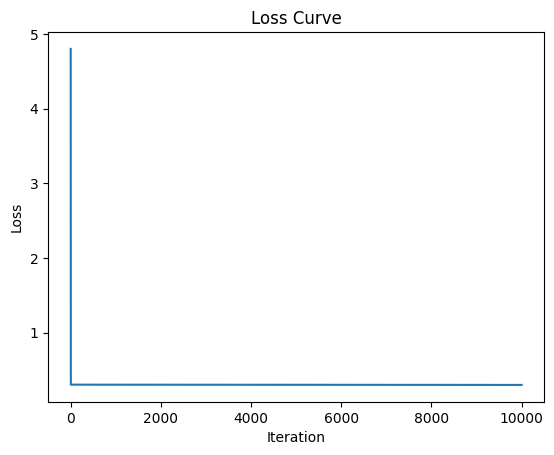

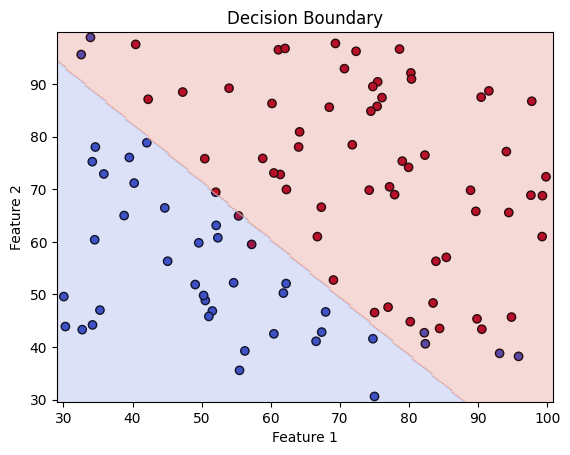

In [86]:
# 分类问题
X_train, y_train = load_data('./9.Week 3 practice lab logistic regression/data/ex2data1.txt')  
print(X_train.shape, y_train.shape) 

# 参数初值选择
w = np.zeros(X_train.shape[1])
b = -8       # b=0的话，分类效果不好
c = 0
lr = 0.001
iters = 10000
model = 'logistic'

w, b, loss_list = train(X_train, y_train, w, b, c, lr, iters, model)
y_pred = predict_label(X_train, w, b, model)

print(f'W = {w}, b = {b}')
print(f'Accuray = {accuracy(y_pred, y_train)}')
plot_loss(loss_list)
show(X_train, y_train, w, b, model)

(118, 2) (118,)
(118, 27) (118,)
Iteration 0/10000, Loss: 0.8217
Iteration 1000/10000, Loss: 0.6144
Iteration 2000/10000, Loss: 0.5895
Iteration 3000/10000, Loss: 0.5739
Iteration 4000/10000, Loss: 0.5635
Iteration 5000/10000, Loss: 0.5564
Iteration 6000/10000, Loss: 0.5516
Iteration 7000/10000, Loss: 0.5482
Iteration 8000/10000, Loss: 0.5459
Iteration 9000/10000, Loss: 0.5442
Iteration 9999/10000, Loss: 0.5430
W = [ 4.19750278e-01  9.04112386e-01 -1.59452902e+00 -5.85712848e-01
 -1.00205679e+00  2.52533915e-02 -2.48828961e-01 -2.57763988e-01
 -1.81466975e-01 -1.16776155e+00 -5.68802743e-02 -4.51590331e-01
 -1.66830877e-01 -9.40578620e-01 -2.35168027e-01 -1.54372333e-01
 -5.80709516e-02 -1.94827264e-01 -1.95941084e-01 -4.64165758e-01
 -8.46391964e-01 -4.48295649e-04 -2.20898420e-01 -7.96676284e-04
 -2.41085798e-01 -8.19238105e-02 -8.17351697e-01], b = 1.000447292159909
Accuray = 0.8305084745762712


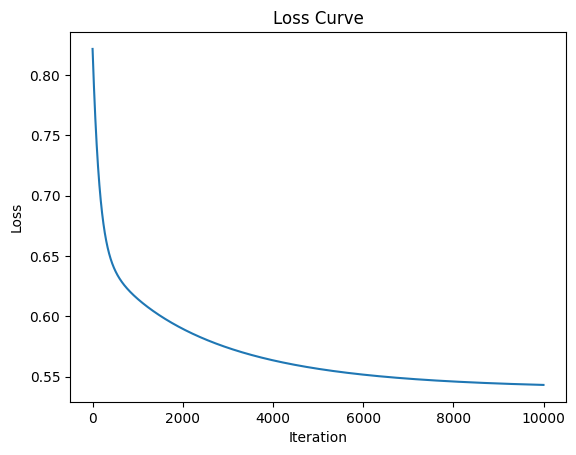

In [87]:
X_train, y_train = load_data('./9.Week 3 practice lab logistic regression/data/ex2data2.txt')
print(X_train.shape, y_train.shape)

# 可视化初始训练数据后，发现线性不可分，需要进行特征工程
X_train = feature_mapping(X_train, degree=6)
print(X_train.shape, y_train.shape)

w = np.zeros(X_train.shape[1])
b = 1.
c = 0.01
lr = 0.01 
iters = 10000
model = 'logistic'

w, b, loss_list = train(X_train, y_train, w, b, c, lr, iters, model)
y_pred = predict_label(X_train, w, b, model)

print(f'W = {w}, b = {b}')
print(f'Accuray = {accuracy(y_pred, y_train)}')
plot_loss(loss_list)
# show(X_train, y_train, w, b, model)


In [88]:
# 测试代码（两种等价写法）
def test1():
    X = np.array([[2, 3],
                [3, 5],
                [5, 7]])
    degree = 2

    X1 = np.atleast_1d(X[:, 0]).reshape((-1, 1))
    X2 = np.atleast_1d(X[:, 1]).reshape((-1, 1))
    out = []

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append( ( X1 ** (i - j) * (X2 ** j) ) )
        print(out)

    print(np.hstack(out))


def test2():
    X = np.array([[2, 3],
                [3, 5],
                [5, 7]])
    degree = 2

    X1 = np.atleast_1d(X[:, 0])
    X2 = np.atleast_1d(X[:, 1])
    out = []

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append( ( X1 ** (i - j) * (X2 ** j) ) )
        print(out)

    print(np.vstack(out).T)

test1()
test2()


[array([[2],
       [3],
       [5]]), array([[3],
       [5],
       [7]])]
[array([[2],
       [3],
       [5]]), array([[3],
       [5],
       [7]]), array([[ 4],
       [ 9],
       [25]]), array([[ 6],
       [15],
       [35]]), array([[ 9],
       [25],
       [49]])]
[[ 2  3  4  6  9]
 [ 3  5  9 15 25]
 [ 5  7 25 35 49]]
[array([2, 3, 5]), array([3, 5, 7])]
[array([2, 3, 5]), array([3, 5, 7]), array([ 4,  9, 25]), array([ 6, 15, 35]), array([ 9, 25, 49])]
[[ 2  3  4  6  9]
 [ 3  5  9 15 25]
 [ 5  7 25 35 49]]
